In [2]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [1049]:
df = pd.read_csv('Project1_LinearRegression_Finished\commodity 2000-2022.csv\commodity 2000-2022.csv')

In [1050]:
df.describe()

,Open,High,Low,Close,Volume
count,29935.000000,29935.000000,29935.000000,29935.000000,2.993500e+04
mean,2199.912965,2217.497624,2183.193574,2200.980681,5.272722e+04
std,5054.172000,5088.374345,5024.451547,5054.979572,8.280148e+04
min,0.000000,0.000000,0.000000,1.482000,0.000000e+00
25%,48.075000,48.975000,47.265000,48.140000,1.000000e+00
50%,431.300000,435.500000,428.000000,431.400000,1.157100e+04
75%,1165.300000,1173.050000,1158.050000,1168.600000,7.218800e+04
max,81066.500000,86791.500000,81031.500000,81051.500000,1.083978e+06


In [1051]:
df['Symbol'].unique()

array(['Gold', 'Palladium', 'Nickel', 'Brent Oil', 'Natural Gas',
       'US Wheat'], dtype=object)

In [1052]:
# Replace string values into integers
# In integer values:
# Gold = 0, Palladium = 1, Nickel = 2, Brent Oil = 3, Natural Gas = 4 and US Wheat = 5
df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})

C:\Users\vilil\AppData\Local\Temp\ipykernel_20832\363166622.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gold': 0, 'Palladium': 1, 'Nickel': 2, 'Brent Oil': 3, 'Natural Gas': 4, 'US Wheat': 5})


In [1053]:
df

,Symbol,Date,Open,High,Low,Close,Volume
0,0,2000-01-04,281.00,281.00,281.00,282.70,4
1,0,2000-01-05,283.20,283.20,283.20,281.10,16
2,0,2000-01-06,281.40,281.40,281.40,281.40,0
3,0,2000-01-07,281.90,281.90,281.90,281.90,0
4,0,2000-01-10,281.70,281.70,281.70,281.70,0
...,...,...,...,...,...,...,...
29930,5,2022-04-04,989.50,1014.50,984.75,1010.25,0
29931,5,2022-04-05,1020.50,1074.00,1020.00,1045.25,0
29932,5,2022-04-06,1049.40,1056.40,1024.25,1041.12,0
29933,5,2022-04-07,1040.25,1044.50,1017.75,1020.00,0


In [1054]:
# convert the date column into a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# extract the day, month, and year components
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# show the modified data frame
print(df)

       Symbol       Date     Open     High      Low    Close  Volume  Day  \
0           0 2000-01-04   281.00   281.00   281.00   282.70       4    4   
1           0 2000-01-05   283.20   283.20   283.20   281.10      16    5   
2           0 2000-01-06   281.40   281.40   281.40   281.40       0    6   
3           0 2000-01-07   281.90   281.90   281.90   281.90       0    7   
4           0 2000-01-10   281.70   281.70   281.70   281.70       0   10   
...       ...        ...      ...      ...      ...      ...     ...  ...   
29930       5 2022-04-04   989.50  1014.50   984.75  1010.25       0    4   
29931       5 2022-04-05  1020.50  1074.00  1020.00  1045.25       0    5   
29932       5 2022-04-06  1049.40  1056.40  1024.25  1041.12       0    6   
29933       5 2022-04-07  1040.25  1044.50  1017.75  1020.00       0    7   
29934       5 2022-04-08  1020.00  1054.25  1017.00  1051.50       0    8   

       Month  Year  
0          1  2000  
1          1  2000  
2          1

In [1055]:
# drop unneccesary "Date" because now on we'll use it in day, month and year sections
df = df.drop('Date', axis=1)

print(df)

       Symbol     Open     High      Low    Close  Volume  Day  Month  Year
0           0   281.00   281.00   281.00   282.70       4    4      1  2000
1           0   283.20   283.20   283.20   281.10      16    5      1  2000
2           0   281.40   281.40   281.40   281.40       0    6      1  2000
3           0   281.90   281.90   281.90   281.90       0    7      1  2000
4           0   281.70   281.70   281.70   281.70       0   10      1  2000
...       ...      ...      ...      ...      ...     ...  ...    ...   ...
29930       5   989.50  1014.50   984.75  1010.25       0    4      4  2022
29931       5  1020.50  1074.00  1020.00  1045.25       0    5      4  2022
29932       5  1049.40  1056.40  1024.25  1041.12       0    6      4  2022
29933       5  1040.25  1044.50  1017.75  1020.00       0    7      4  2022
29934       5  1020.00  1054.25  1017.00  1051.50       0    8      4  2022

[29935 rows x 9 columns]


In [1056]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[['Symbol', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Volume']]

# have only the target variable here (dependent variable)
y = df['Close']

In [1057]:
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,29935.000000,29935.000000,29935.000000,29935.000000,29935.000000,2.993500e+04,29935.000000,29935.000000,29935.000000
mean,2.653249,2199.912965,2217.497624,2183.193574,2200.980681,5.272722e+04,15.677568,6.491933,2011.788141
std,1.777200,5054.172000,5088.374345,5024.451547,5054.979572,8.280148e+04,8.785675,3.454047,6.230137
min,0.000000,0.000000,0.000000,0.000000,1.482000,0.000000e+00,1.000000,1.000000,2000.000000
25%,1.000000,48.075000,48.975000,47.265000,48.140000,1.000000e+00,8.000000,3.000000,2007.000000
50%,3.000000,431.300000,435.500000,428.000000,431.400000,1.157100e+04,16.000000,7.000000,2012.000000
75%,4.000000,1165.300000,1173.050000,1158.050000,1168.600000,7.218800e+04,23.000000,10.000000,2017.000000
max,5.000000,81066.500000,86791.500000,81031.500000,81051.500000,1.083978e+06,31.000000,12.000000,2022.000000


In [1058]:
# version 1, SciPy, extreme outliers that go under -3 or over +3 in normal distribution
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

# version 2, use quantiles
 #this removes top 10% and bottom 10% from the distribution (extreme values)
 #price is used as the variable. you can also use this for other variables, like area
#df_middle= df.query('Close >= Close.quantile(q=0.40) and Close < Close.quantile(q=0.60)')

In [1059]:
# Check if values have changed due to getting rid of the outliers
df.describe()

,Symbol,Open,High,Low,Close,Volume,Day,Month,Year
count,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000,28204.000000
mean,2.669692,1503.596308,1519.025732,1488.693267,1504.669178,47855.838214,15.792193,6.505283,2011.584598
std,1.823243,3483.430196,3520.506606,3448.694922,3484.538411,69921.067960,8.785399,3.450257,6.255584
min,0.000000,0.000000,0.000000,0.000000,1.482000,0.000000,1.000000,1.000000,2000.000000
25%,1.000000,42.550000,43.395000,41.600000,42.715000,3.000000,8.000000,3.000000,2007.000000
50%,3.000000,420.225000,423.225000,417.000000,420.225000,11628.500000,16.000000,7.000000,2012.000000
75%,4.000000,939.025000,947.825000,931.075000,938.275000,69478.500000,23.000000,10.000000,2017.000000
max,5.000000,17351.000000,17475.000000,17241.000000,17357.000000,301107.000000,31.000000,12.000000,2022.000000


In [1060]:
# create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1061]:
# initialize the scaler and process X-values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1062]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [1063]:
intercept = lm.intercept_

# this will be a list of variables (to support multiple linear regression)
# the slopes of the different variables in the linear regression formula
coefs = lm.coef_

# if you want to have a nice table of different variable values:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Symbol,-1.130771
Year,1.599085
Month,0.054448
Day,-0.344150
Open,-604.728311
High,2673.606190
Low,3024.249439
Volume,-1.129470


In [1064]:
# Calculate prediction for test results
predictions = lm.predict(X_test)

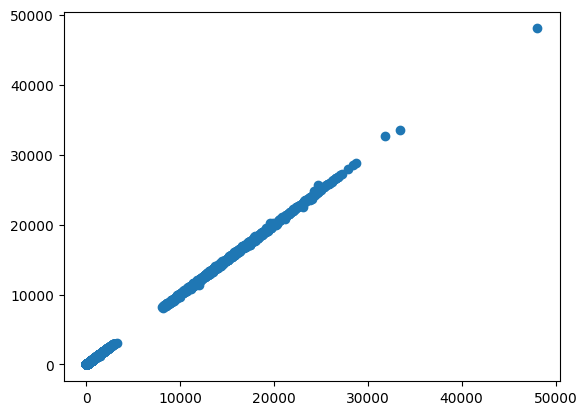

In [1065]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
plt.scatter(y_test, predictions)
plt.show()

Scatterplot is following linear line very well from bottom left corner towardards top right corner

In [1066]:
# Create tester row to try out your model with plausible values
tester_row = {
    'Symbol':4,
    'Year':2022,
    'Month':10,
    'day':11,
    'Open':1000,
    'High':800,
    'Low':300,
    'Volume':9
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

In [1067]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted price for subject element:")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted price for subject element:
2446862.26 $
----------------


c:\Users\vilil\Desktop\Cloud-Based_Machine_Learning_2024\Project1\.venv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [1068]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model descibes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
11.24 $

MSE
1473.66 $^2

RMSE:
38.39 $

R-squared:
1.0


Error metrics seem alright. R-squared gto perfect score  (1/1)

C:\Users\vilil\AppData\Local\Temp\ipykernel_20832\3920156057.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


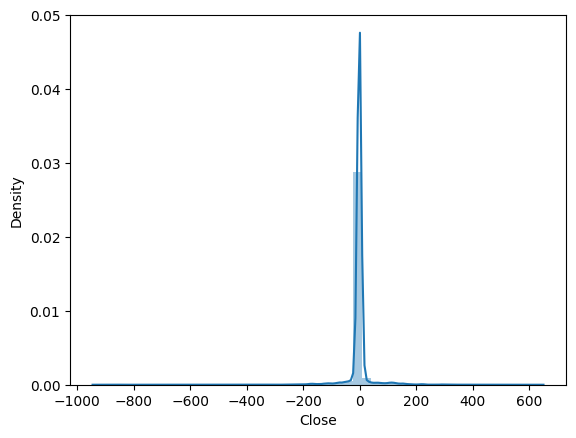

In [1069]:
# if the prediction distribution are far from normal distribution
# then the model is not probably good enough
# distplot is deprecating in future pandas-version
# unfortunately, there's no exact alternative to do this plot at the moment
sns.distplot((y_test - predictions))
plt.show()
plt.close()

Distplot looks funcky but does it's job

In [1070]:
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

# how to interpret -> low score means the effect of this field is not large in the dataset
# => typically means other columns in the dataset have similar correlations, 
# therefore making this particular column not so useful since other columns 
# already fill this role for this correlation

# Fisher's score studies the variance of the data -> statistical significance

KeyboardInterrupt: 